In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
#importing the required libraries and models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC

In [14]:
#reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df = df[['v2', 'v1']] #deleting unwanted columns
df = df.rename(columns={'v2': 'message', 'v1': 'detect'}) #renaming the columns for clarity
df.head()

,message,detect
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [16]:
df.isnull().sum() #checking for NaN values

message    0
detect     0
dtype: int64

In [17]:
#cleaning the text
STOP = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOP)
    return text

In [18]:
df['clean'] = df['message'].apply(clean_text)
df.head()

,message,detect,clean
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


In [19]:
X = df['clean']
y = df['detect']

In [23]:
def classify_and_plot(model, X, y):
    # Data split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

    # Creating a pipeline for text classification
    pipeline_model = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', model)
    ])

    # Training the model
    pipeline_model.fit(x_train, y_train)

    # Evaluating the model
    accuracy = pipeline_model.score(x_test, y_test) * 100
    y_pred = pipeline_model.predict(x_test)
    report = classification_report(y_test, y_pred)

    # Plotting a bar chart to visualize model accuracy
    plt.figure(figsize=(8, 4))
    plt.bar(['Accuracy'], [accuracy])
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title('Model Accuracy')
    plt.show()

    # Printing the classification report
    print('Accuracy:', accuracy)
    print(report)

SVC Model
---------


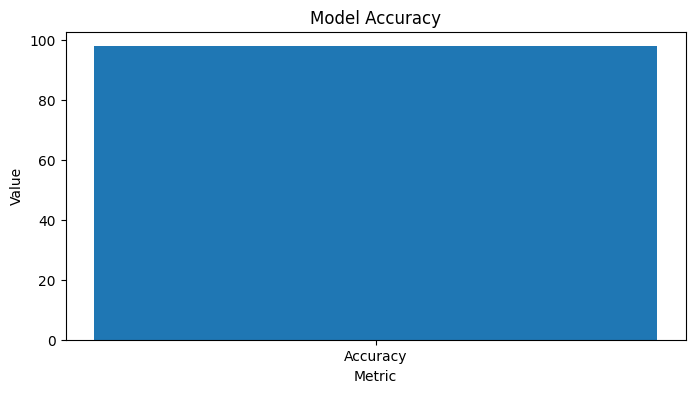

Accuracy: 97.9372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

------------------------------------------END---------------------------------------


In [26]:
  print("SVC Model")
  print("---------")
  from sklearn.svm import SVC
  model = SVC(C=3)
  classify_and_plot(model, X, y)
  print("------------------------------------------END---------------------------------------")